In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
data  = pd.read_csv('CreditScoring.csv')

In [50]:
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital', ylabel='count'>

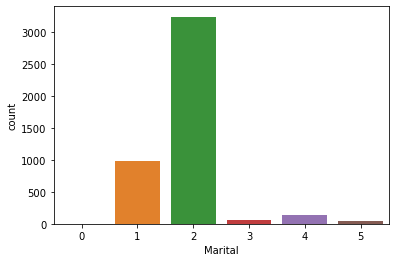

In [6]:
sns.countplot(data.Marital)


<AxesSubplot:>

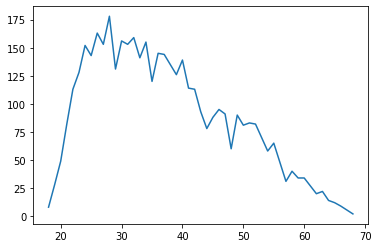

In [7]:
data['Age'].value_counts().sort_index().plot.line()

<AxesSubplot:ylabel='Frequency'>

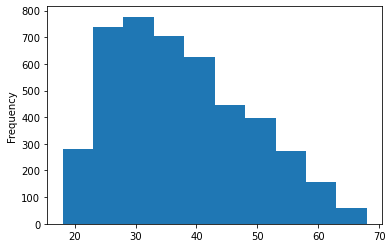

In [8]:
data['Age'].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

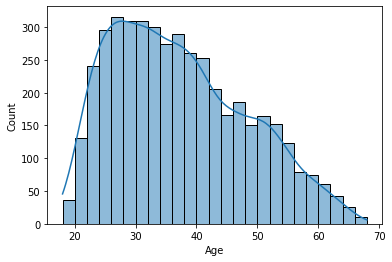

In [9]:
sns.histplot(data.Age,kde=True)

In [10]:
data['Income'].mean()

763316.9939393939

In [11]:
np.var(data["Income"])

75736088650116.31

In [12]:
np.std(data["Income"])

8702648.369899608

<AxesSubplot:>

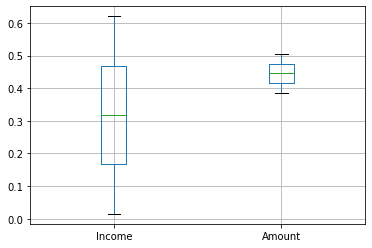

In [37]:
data = pd.DataFrame(data = np.random.random(size=(2,2)), columns = ['Income','Amount'])
data.boxplot()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Amount'>

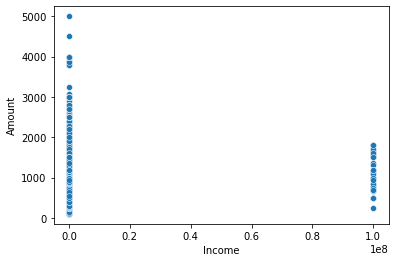

In [32]:
 sns.scatterplot( data.Income, data.Amount)


In [6]:
data['Income'].corr(data['Amount'])

0.01965902805383328

In [7]:
from sklearn.linear_model import LinearRegression
X= data[["Income"]].values.reshape(-1,1)
Y= data.Amount.values.reshape(-1,1)

In [8]:
X.shape,Y.shape

((4455, 1), (4455, 1))

In [9]:
model = LinearRegression().fit(X,Y) 

In [10]:
r_sq = model.score(X,Y)

In [11]:
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)

coefficient of determination: 0.00038647738402131093
intercept: [1038.20360552]
coef: [[1.07185845e-06]]


In [12]:
a = model.coef_[0][0]
b = model.intercept_[0]

def predict(x) :
    y = a*x+b
    return y
predict(2)

1038.2036076613374

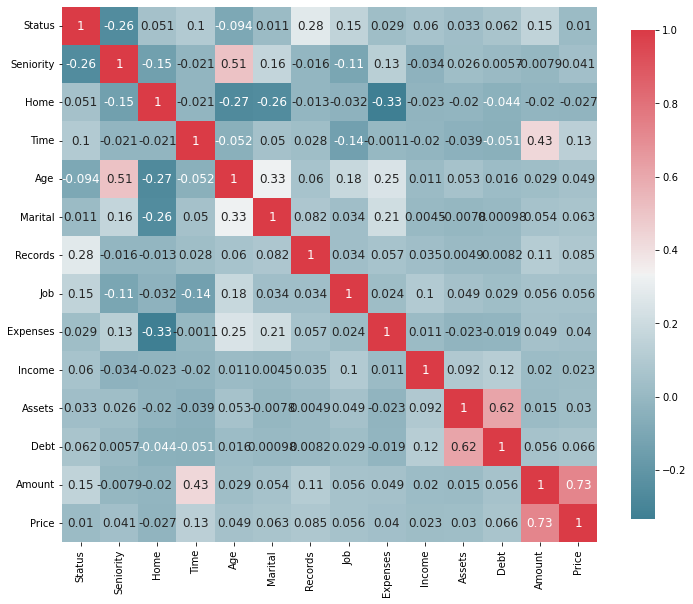

In [14]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)

In [15]:
X = data.iloc[:,1:8].values
y = data.iloc[:,0].values
X

array([[ 9,  1, 60, ...,  2,  1,  3],
       [17,  1, 60, ...,  3,  1,  1],
       [10,  2, 36, ...,  2,  2,  3],
       ...,
       [ 0,  2, 24, ...,  2,  1,  2],
       [ 0,  1, 48, ...,  1,  1,  3],
       [ 5,  2, 60, ...,  2,  1,  3]], dtype=int64)

In [16]:
y

array([1, 1, 2, ..., 2, 1, 1], dtype=int64)

In [17]:
np.shape(X)

(4455, 7)

In [18]:
# data standardization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [19]:
# Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00022452 -0.14591028 -0.02132526  0.5059006   0.16346959 -0.01567776
  -0.10936359]
 [-0.14591028  1.00022452 -0.02088518 -0.27084487 -0.26077074 -0.01320753
  -0.03204882]
 [-0.02132526 -0.02088518  1.00022452 -0.05197723  0.04998961  0.0281003
  -0.13848541]
 [ 0.5059006  -0.27084487 -0.05197723  1.00022452  0.32572541  0.06018403
   0.17948695]
 [ 0.16346959 -0.26077074  0.04998961  0.32572541  1.00022452  0.08245855
   0.03411301]
 [-0.01567776 -0.01320753  0.0281003   0.06018403  0.08245855  1.00022452
   0.03390517]
 [-0.10936359 -0.03204882 -0.13848541  0.17948695  0.03411301  0.03390517
   1.00022452]]


In [20]:
print('NumPy covariance matrix:\n%s' %np.cov(X_std.T))

NumPy covariance matrix:
[[ 1.00022452 -0.14591028 -0.02132526  0.5059006   0.16346959 -0.01567776
  -0.10936359]
 [-0.14591028  1.00022452 -0.02088518 -0.27084487 -0.26077074 -0.01320753
  -0.03204882]
 [-0.02132526 -0.02088518  1.00022452 -0.05197723  0.04998961  0.0281003
  -0.13848541]
 [ 0.5059006  -0.27084487 -0.05197723  1.00022452  0.32572541  0.06018403
   0.17948695]
 [ 0.16346959 -0.26077074  0.04998961  0.32572541  1.00022452  0.08245855
   0.03411301]
 [-0.01567776 -0.01320753  0.0281003   0.06018403  0.08245855  1.00022452
   0.03390517]
 [-0.10936359 -0.03204882 -0.13848541  0.17948695  0.03411301  0.03390517
   1.00022452]]


Text(0.5, 1.0, 'Correlation between different features')

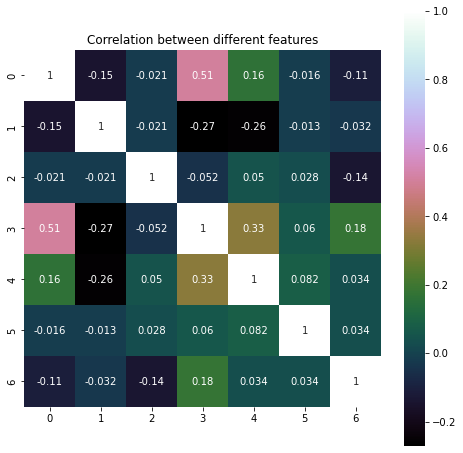

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')

In [22]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.49077652  0.59265117  0.20236041 -0.42592506 -0.37899534 -0.1144022
  -0.16975209]
 [ 0.4093916  -0.09100892 -0.06381517 -0.16676893 -0.49395753  0.58677058
  -0.45159483]
 [ 0.02620863  0.01049859  0.62677735  0.37100135  0.22507882 -0.139472
  -0.63134628]
 [-0.60781299 -0.71940954 -0.11220857 -0.11721933 -0.13739781 -0.04595176
  -0.25630532]
 [-0.4510882   0.16377092  0.08797752  0.30882831  0.23446039  0.76387426
   0.16765441]
 [-0.08498067  0.0449724  -0.05313716  0.70469952 -0.6603714  -0.17124943
   0.16097839]
 [-0.10349451  0.30655869 -0.73414827  0.21775505  0.22752536 -0.09065415
  -0.49893261]]

Eigenvalues 
[1.8740941  0.39556136 1.17161442 1.06422233 0.9433339  0.72417496
 0.82857055]


In [23]:
# Make a list of(eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x:x[0],reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:
1.874094096204172
1.1716144233849117
1.0642223322138802
0.9433339037993781
0.8285705465032852
0.7241749606235293
0.3955613582856671


In [24]:
tot = sum(eig_vals)
var_exp = [(i /tot)*100 for i in sorted(eig_vals, reverse=True)]

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layouut'

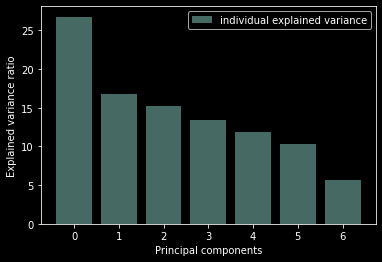

In [25]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layouut()

In [26]:
# Projection Matrix


matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1),
                     eig_pairs[1][1].reshape(7,1)
                     ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49077652  0.20236041]
 [ 0.4093916  -0.06381517]
 [ 0.02620863  0.62677735]
 [-0.60781299 -0.11220857]
 [-0.4510882   0.08797752]
 [-0.08498067 -0.05313716]
 [-0.10349451 -0.73414827]]


In [27]:
Y=X_std.dot(matrix_w)
Y

array([[-0.25568715, -0.23519717],
       [-2.7693849 ,  1.35273437],
       [-1.21424578, -1.58039156],
       ...,
       [ 0.19575453, -1.33941032],
       [ 1.35148563, -1.0364905 ],
       [ 0.12807984, -0.39430308]])

Text(0, 0.5, 'Cumulative explained variance')

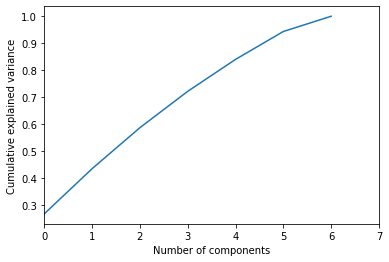

In [29]:
# PCA in scikit-learn
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [30]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(X_std)

[[ 0.12392675 -1.02901838  0.92525164 ...  0.18796372 -0.45819237
   1.38808169]
 [ 1.10281624 -1.02901838  0.92525164 ...  1.74154145 -0.45819237
  -0.70851229]
 [ 0.24628794 -0.40801095 -0.71257335 ...  0.18796372  2.18248941
   1.38808169]
 ...
 [-0.97732393 -0.40801095 -1.53148585 ...  0.18796372 -0.45819237
   0.3397847 ]
 [-0.97732393 -1.02901838  0.10633914 ... -1.365614   -0.45819237
   1.38808169]
 [-0.365518   -0.40801095  0.92525164 ...  0.18796372 -0.45819237
   1.38808169]]


In [31]:
Y_sklearn.shape

(4455, 6)

In [95]:
df=  pd.read_csv('CleanCreditScoring.csv')
df 


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,bad,1,rent,60,39,married,no_rec,fixed,69,92,...,"time (48,99]","age (30,40]","exp (60,80]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (1e+03,1.3e+03]","finr (80,90]","sav (0,2]"
4442,good,22,owner,60,46,married,no_rec,fixed,60,75,...,"time (48,99]","age (40,50]","exp (50,60]","inc (0,80]","asset (0,3e+03]","debt (500,1.5e+03]","am (900,1.1e+03]","priz (1e+03,1.3e+03]","finr (70,80]","sav (0,2]"
4443,bad,0,owner,24,37,married,no_rec,partime,60,90,...,"time (12,24]","age (30,40]","exp (50,60]","inc (80,110]","asset (3e+03,5e+03]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (50,70]","sav (0,2]"
4444,good,0,rent,48,23,single,no_rec,freelance,49,140,...,"time (36,48]","age (0,25]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (90,100]","sav (6,99]"


In [100]:
df1=df [['Status', 'Home', 'Marital', 'Job']]

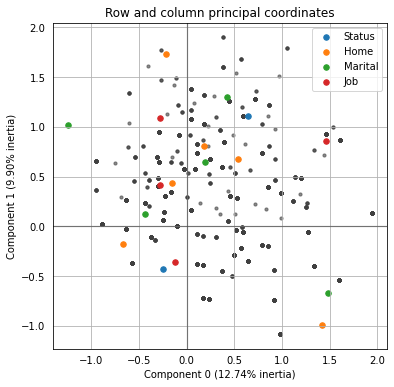

In [101]:
import prince
mca = prince.MCA(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(df1)
mca
ax = mca.plot_coordinates( X=df1,
  ax=None,
   figsize=(6, 6),
 show_row_points=True,
  row_points_size=10,
 show_row_labels=False,
  show_column_points=True,
 column_points_size=30,
  show_column_labels=False,
  legend_n_cols=1 )